## EDA Refresher

### Data loading

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore all warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import our data
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/breast-cancer.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [3]:
df_copy = df.copy()

7. Attribute Information:
   1. Class: no-recurrence-events, recurrence-events
   2. age: 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, 70-79, 80-89, 90-99.
   3. menopause: lt40, ge40, premeno.
   4. tumor-size: 0-4, 5-9, 10-14, 15-19, 20-24, 25-29, 30-34, 35-39, 40-44,
                  45-49, 50-54, 55-59.
   5. inv-nodes: 0-2, 3-5, 6-8, 9-11, 12-14, 15-17, 18-20, 21-23, 24-26,
                 27-29, 30-32, 33-35, 36-39.
   6. node-caps: yes, no.
   7. deg-malig: 1, 2, 3.
   8. breast: left, right.
   9. breast-quad: left-up, left-low, right-up,	right-low, central.
  10. irradiat:	yes, no.

In [4]:
# add column names to the dataframe
df.columns = ['age', 'menopause', 'tumor-size', 'inv-nodes', 
              'node-caps', 'deg-malig', 'breast', 'breast-quad', 
              'irradiat', 'class']

df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,'40-49','premeno','15-19','0-2','yes','3','right','left_up','no','recurrence-events'
1,'50-59','ge40','15-19','0-2','no','1','right','central','no','no-recurrence-events'
2,'50-59','ge40','35-39','0-2','no','2','left','left_low','no','recurrence-events'
3,'40-49','premeno','35-39','0-2','yes','3','right','left_low','yes','no-recurrence-events'
4,'40-49','premeno','30-34','3-5','yes','2','left','right_up','no','recurrence-events'


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    278 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  285 non-null    object
 8   irradiat     286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [6]:
# create a function to remove quoation marks from the data ('40-49' we need 40-49)
def clean_QuoationMarks(data):
    x = str(data)
    # if x has ' remove it
    if "'" in x:
        x = x.replace("'", "")
    return x

# apply the function to the dataframe
for col in df.columns:
    df[col] = df[col].apply(clean_QuoationMarks)

# check the first 5 rows of the dataframe
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [7]:
## check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          286 non-null    object
 1   menopause    286 non-null    object
 2   tumor-size   286 non-null    object
 3   inv-nodes    286 non-null    object
 4   node-caps    286 non-null    object
 5   deg-malig    286 non-null    object
 6   breast       286 non-null    object
 7   breast-quad  286 non-null    object
 8   irradiat     286 non-null    object
 9   class        286 non-null    object
dtypes: object(10)
memory usage: 22.5+ KB


In [8]:
# summary statistics

# numeric summary statistics - only for numeric columns
df.describe(include='object') # summary statistics for categorical columns

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
count,286,286,286,286,286,286,286,286,286,286
unique,6,3,11,7,3,3,2,6,2,2
top,50-59,premeno,30-34,0-2,no,2,left,left_low,no,no-recurrence-events
freq,96,150,60,213,222,130,152,110,218,201


In [9]:
# single variable analysis
df['class'].value_counts()

class
no-recurrence-events    201
recurrence-events        85
Name: count, dtype: int64

In [10]:
# checking for missing values
df.isnull().sum()

age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
irradiat       0
class          0
dtype: int64

In [11]:
# duplicates
print('Total duplicates: ', df.duplicated().sum())

# create a dataframe with the duplicates
duplicates = df[df.duplicated(keep=False)]

# sort the dataframe by all columns
duplicates.sort_values(by=list(duplicates.columns))

Total duplicates:  14


,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
35,30-39,premeno,15-19,0-2,no,1,left,left_low,no,no-recurrence-events
44,30-39,premeno,15-19,0-2,no,1,left,left_low,no,no-recurrence-events
40,30-39,premeno,35-39,0-2,no,3,left,left_low,no,recurrence-events
267,30-39,premeno,35-39,0-2,no,3,left,left_low,no,recurrence-events
23,40-49,premeno,10-14,0-2,no,1,right,left_up,no,no-recurrence-events
27,40-49,premeno,10-14,0-2,no,1,right,left_up,no,no-recurrence-events
175,40-49,premeno,20-24,0-2,no,2,right,left_up,no,no-recurrence-events
214,40-49,premeno,20-24,0-2,no,2,right,left_up,no,no-recurrence-events
133,40-49,premeno,25-29,0-2,no,2,right,left_low,no,recurrence-events
178,40-49,premeno,25-29,0-2,no,2,right,left_low,no,recurrence-events


In [12]:
# drop duplicates
df = df.drop_duplicates()

### Data Visualization

- visualize using pandas
- visualize using seaborn
- visualize using matplotlib

node-caps, tumor-size, class, age

In [15]:
# setup your plot style
plt.style.use('fivethirtyeight')

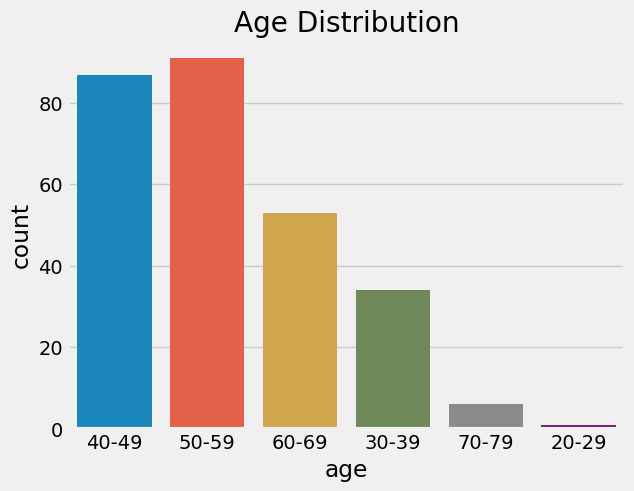

In [17]:
# create a countplot for the age column
sns.countplot(data=df, x='age')
plt.title('Age Distribution')
plt.show()

The bar graph above illustrates the age distribution of the sample data we are working with. The 50-59 age group has the highest count, followed by the 40-49 group, indicating a concentration of middle-aged individuals. The younger (20-29) and older (70-79) age groups are significantly less represented.

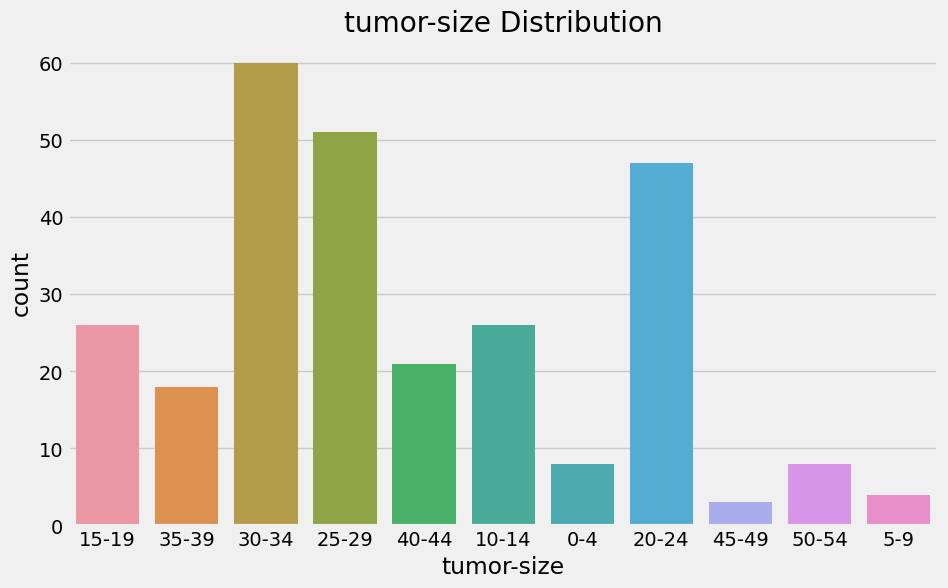

In [21]:
# create a countplot for the age column
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='tumor-size')
plt.title('tumor-size Distribution')
# rotate the x-axis labels
# plt.xticks(rotation=45)
plt.show()

#### Other plots and Their uses. 

- Scatter plot: To show the relationship between two variables.
- Histogram: To show the distribution of a single variable(should be numeric).
- Box plot: To show the distribution of a single variable and to compare the distribution of a variable across levels of another variable. We can tell if the data has outliers or not. 
- Bar plot: To show the distribution of a categorical variable.
- Line plot: To show the trend of a variable over time.
- Heatmap: To show the correlation between variables.

## Preaparing the data for modeling

### Task 1: Data Encoding

We convert categorical variables to numerical variables using: 
- pandas get_dummies 
- sklearn LabelEncoder 
- sklearn OneHotEncoder
- sklearn OrdinalEncoder.

Why do we convert the categorical variables to numerical variables?
- machine learning models require numerical input data.

Categorical means your are working with data that is of type object

In [22]:
df.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events


In [24]:
# convert values in the deg-malig to be int from string
df['deg-malig'] = df['deg-malig'].astype(int)

### Pandas get_dummies

*sample data - non encoded*

|row num | Item      | Quantity |
| ----------- | ----------- | ----------- |
|1| Laptop     | 12     |
|2| Printer   | 14        |
|3| DashCam   | 11       |
|4| Printer   | 2       |
|5| Laptop  | 5        |

*sample data - encoded*

|row num| Item_Laptop      | Item_Printer | Item_DashCam | Quantity |
| ----------- | ----------- | ----------- | ----------- | ----------- |
|1| 1     | 0 | 0 | 12 |
|2| 0   | 1 | 0 | 14 |
|3| 0   | 0 | 1 | 11 |
|4| 0   | 1 | 0 | 2 |
|5| 1   | 0 | 0 | 5 |

*sample data - encoded (drop_first=True)*

|row num| Item_Laptop      | Item_Printer | Quantity |
| ----------- | ----------- | ----------- | ----------- |
|1| 1     | 0 | 12 |
|2| 0   | 1 | 14 |
|3| 0   | 0 | 11 |
|4| 0   | 1 | 2 |
|5| 1   | 0 | 5 |


I don't recomment the use of this method cause it might create a lot of columns in your dataset.

In [31]:
# encode the data

pd.get_dummies(df)

,deg-malig,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,...,breast-quad_central,breast-quad_left_low,breast-quad_left_up,breast-quad_nan,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes,class_no-recurrence-events,class_recurrence-events
0,3,False,False,True,False,False,False,False,False,True,...,False,False,True,False,False,False,True,False,False,True
1,1,False,False,False,True,False,False,True,False,False,...,True,False,False,False,False,False,True,False,True,False
2,2,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True
3,3,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,True,True,False
4,2,False,False,True,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,True,False,True,False
282,2,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,False,False,True,True,False
283,2,False,True,False,False,False,False,False,False,True,...,False,False,False,False,False,True,True,False,True,False
284,2,False,False,False,True,False,False,False,False,True,...,False,True,False,False,False,False,True,False,True,False


In [29]:
True == 1

True

In [30]:
False == 0

True

In [27]:
# method 2
pd.get_dummies(df, drop_first=True)

,deg-malig,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_lt40,menopause_premeno,tumor-size_10-14,tumor-size_15-19,...,node-caps_no,node-caps_yes,breast_right,breast-quad_left_low,breast-quad_left_up,breast-quad_nan,breast-quad_right_low,breast-quad_right_up,irradiat_yes,class_recurrence-events
0,3,False,True,False,False,False,False,True,False,True,...,False,True,True,False,True,False,False,False,False,True
1,1,False,False,True,False,False,False,False,False,True,...,True,False,True,False,False,False,False,False,False,False
2,2,False,False,True,False,False,False,False,False,False,...,True,False,False,True,False,False,False,False,False,True
3,3,False,True,False,False,False,False,True,False,False,...,False,True,True,True,False,False,False,False,True,False
4,2,False,True,False,False,False,False,True,False,False,...,False,True,False,False,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,2,False,False,True,False,False,False,False,False,False,...,False,True,False,True,False,False,False,False,False,False
282,2,False,False,True,False,False,False,True,False,False,...,False,True,False,True,False,False,False,False,True,False
283,2,True,False,False,False,False,False,True,False,False,...,False,True,True,False,False,False,False,True,False,False
284,2,False,False,True,False,False,False,True,False,True,...,True,False,True,True,False,False,False,False,False,False
